In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Banking.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [4]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [ ]:
bin = [0,100000,300000,float('inf')]
labels = ['low','mid','high']
df['Income band']=pd.cut(df['Estimated Income'],bins=bin,labels=labels,right =False)

<Axes: xlabel='Income band'>

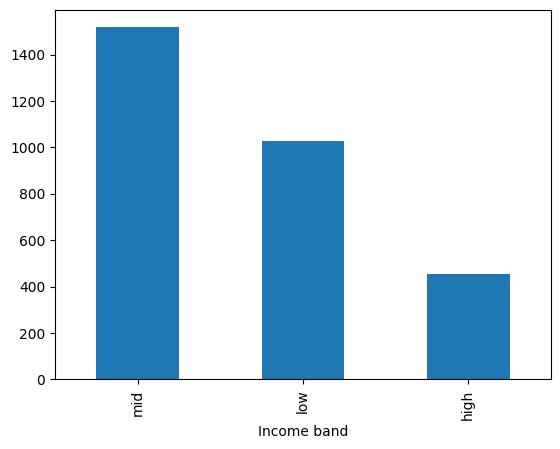

In [6]:
df['Income band'].value_counts().plot(kind='bar')

In [7]:
df['Gender'] = df['GenderId'].map({1: 'Male', 2: 'Female'})

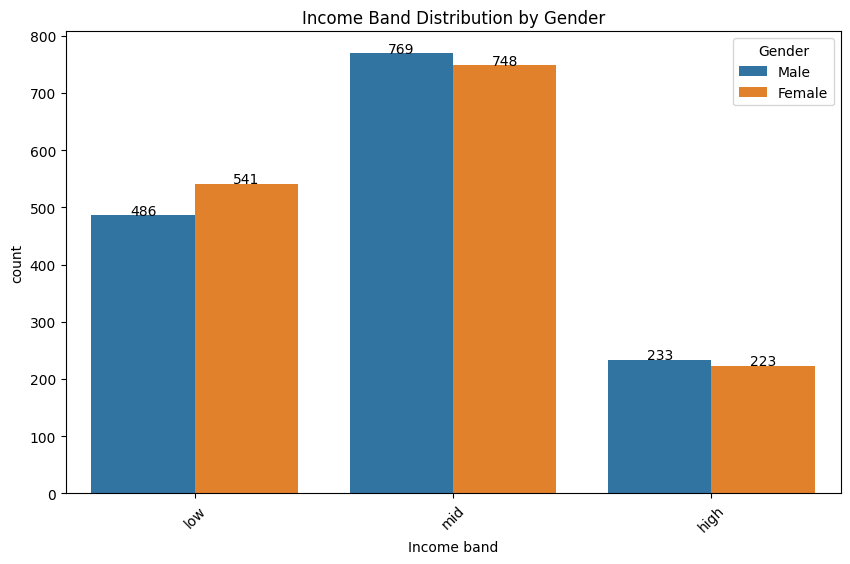

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Income band', hue='Gender')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2., 
            height + 1,  
            int(height), 
            ha="center", fontsize=10
        )
plt.title('Income Band Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [9]:
df['Gender'].value_counts()

Gender
Female    1512
Male      1488
Name: count, dtype: int64

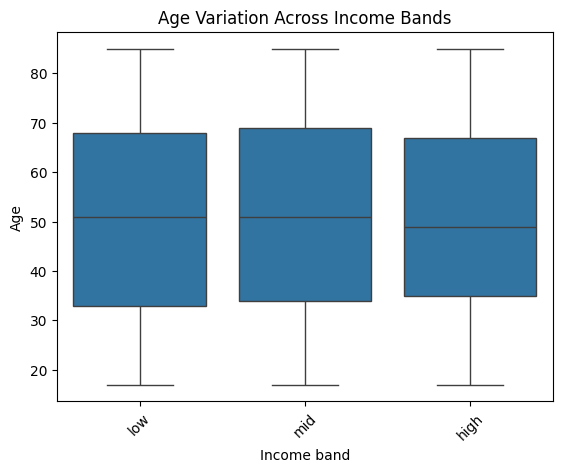

In [10]:
sns.boxplot(data=df, x='Income band', y='Age')
plt.xticks(rotation=45)
plt.title('Age Variation Across Income Bands')
plt.show()

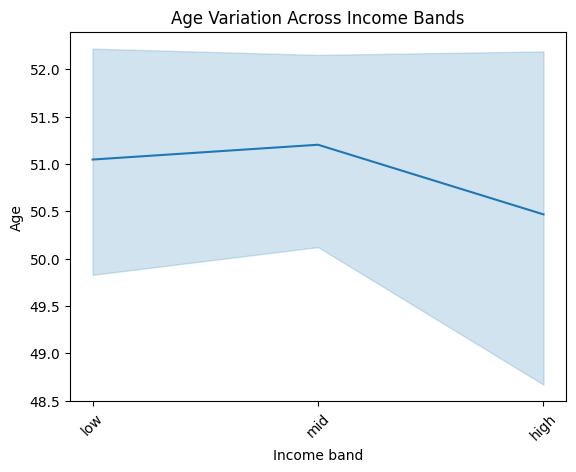

In [11]:
sns.lineplot(data=df, x='Income band', y='Age')
plt.xticks(rotation=45)
plt.title('Age Variation Across Income Bands')
plt.show()


In [12]:
bins = (0,20,40,60,float('inf'))
labels = ( ['0-20', '21-40', '41-60', '60+'])
df["age group"] = pd.cut(df["Age"],bins=bins,labels=labels,right=False)

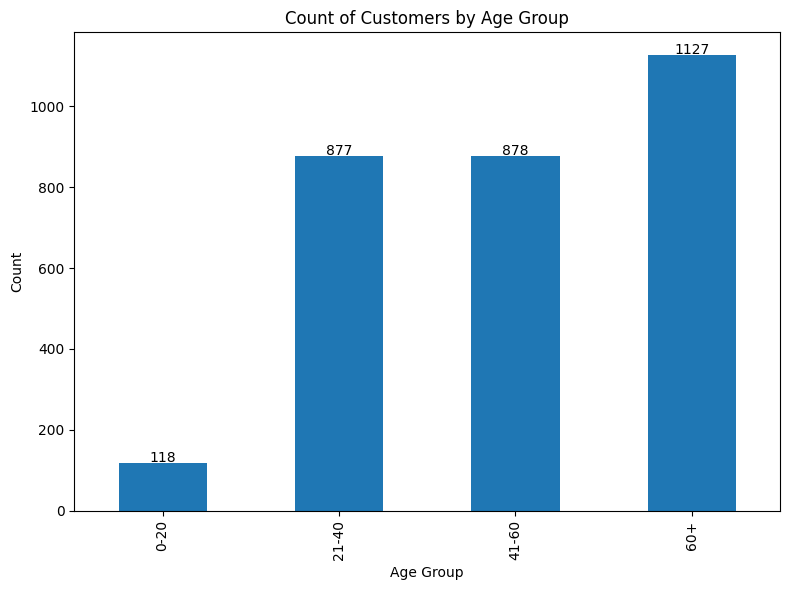

In [ ]:
ax = df['age group'].value_counts().sort_index().plot(kind='bar', figsize=(8,6))
plt.title('Count of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# labels on top of bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            int(height), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [14]:
df['total']=df['Bank Deposits']+df['Saving Accounts']+df['Superannuation Savings']+df['Checking Accounts']+df['Foreign Currency Account']

In [18]:
df['Foreign Currency Account'].sum()

np.float64(89650589.98)

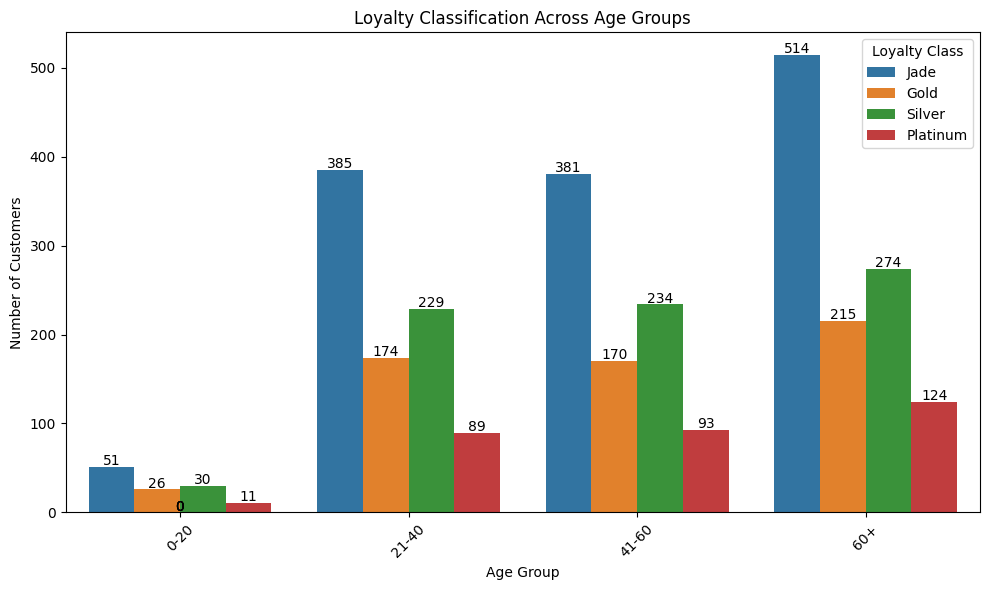

In [21]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='age group', hue='Loyalty Classification')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2,  
            int(height), ha='center', fontsize=10)
plt.title('Loyalty Classification Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Loyalty Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Jade'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Silver'),
  Text(3, 0, 'Platinum')])

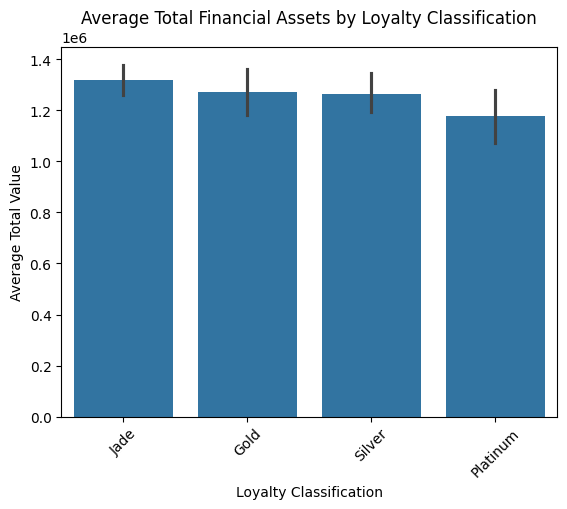

In [27]:
sns.barplot(data=df, x='Loyalty Classification', y='total', estimator='mean')
plt.title("Average Total Financial Assets by Loyalty Classification")
plt.ylabel("Average Total Value")
plt.xticks(rotation=45)


In [37]:
df['total_liability'] = df[['Bank Loans', 'Business Lending', 'Credit Card Balance']].sum(axis=1)


In [40]:
totalloan = df['total_liability'].sum()

C:\Users\anike\AppData\Local\Temp\ipykernel_16844\263940123.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Income band', 'Loyalty Classification']).size().reset_index(name='Count')
C:\Users\anike\AppData\Local\Temp\ipykernel_16844\263940123.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


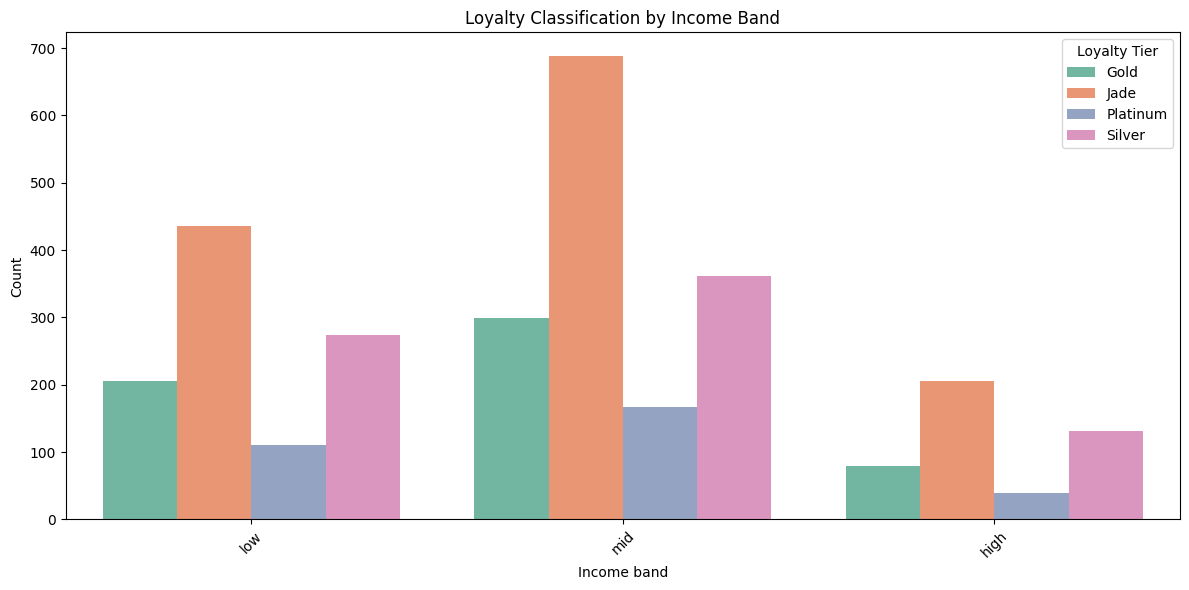

In [ ]:
grouped = df.groupby(['Income band', 'Loyalty Classification']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,x='Income band',y='Count',hue='Loyalty Classification',palette='Set2',ci=None
)
plt.title('Loyalty Classification by Income Band')
plt.xticks(rotation=45)
plt.legend(title='Loyalty Tier')
plt.tight_layout()
plt.show()

C:\Users\anike\AppData\Local\Temp\ipykernel_16844\4074569806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_loan_by_loyalty, x='Loyalty Classification', y='total_liability', palette='Greens')


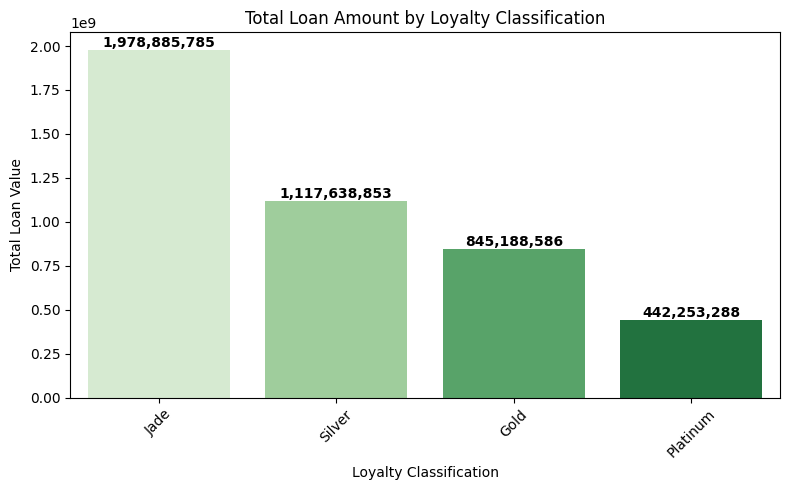

In [43]:
total_loan_by_loyalty = df.groupby('Loyalty Classification')['total_liability'].sum().reset_index()

total_loan_by_loyalty = total_loan_by_loyalty.sort_values('total_liability', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=total_loan_by_loyalty, x='Loyalty Classification', y='total_liability', palette='Greens')

for i, val in enumerate(total_loan_by_loyalty['total_liability']):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('Total Loan Amount by Loyalty Classification')
plt.ylabel('Total Loan Value')
plt.xlabel('Loyalty Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\anike\AppData\Local\Temp\ipykernel_16844\1456146420.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=balance_by_loyalty, x='Loyalty Classification', y='Total Balance', palette='Oranges')


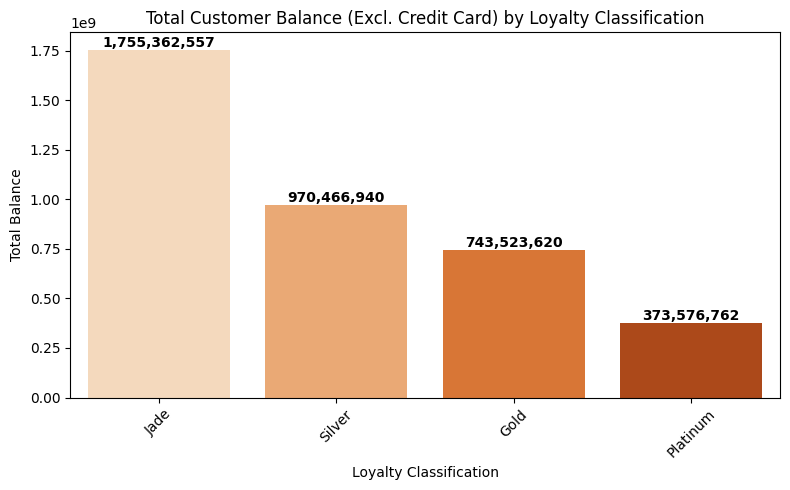

In [45]:

df['Total Balance'] = (
    df['Bank Deposits'] +
    df['Checking Accounts'] +
    df['Saving Accounts'] +
    df['Foreign Currency Account'] +
    df['Superannuation Savings']
)

balance_by_loyalty = df.groupby('Loyalty Classification')['Total Balance'].sum().reset_index()

balance_by_loyalty = balance_by_loyalty.sort_values('Total Balance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=balance_by_loyalty, x='Loyalty Classification', y='Total Balance', palette='Oranges')

for i, val in enumerate(balance_by_loyalty['Total Balance']):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('Total Customer Balance (Excl. Credit Card) by Loyalty Classification')
plt.ylabel('Total Balance')
plt.xlabel('Loyalty Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Client ID                 3000 non-null   object  
 1   Name                      3000 non-null   object  
 2   Age                       3000 non-null   int64   
 3   Location ID               3000 non-null   int64   
 4   Joined Bank               3000 non-null   object  
 5   Banking Contact           3000 non-null   object  
 6   Nationality               3000 non-null   object  
 7   Occupation                3000 non-null   object  
 8   Fee Structure             3000 non-null   object  
 9   Loyalty Classification    3000 non-null   object  
 10  Estimated Income          3000 non-null   float64 
 11  Superannuation Savings    3000 non-null   float64 
 12  Amount of Credit Cards    3000 non-null   int64   
 13  Credit Card Balance       3000 non-null   float6

In [49]:
df.drop('total', axis=1, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Client ID                 3000 non-null   object  
 1   Name                      3000 non-null   object  
 2   Age                       3000 non-null   int64   
 3   Location ID               3000 non-null   int64   
 4   Joined Bank               3000 non-null   object  
 5   Banking Contact           3000 non-null   object  
 6   Nationality               3000 non-null   object  
 7   Occupation                3000 non-null   object  
 8   Fee Structure             3000 non-null   object  
 9   Loyalty Classification    3000 non-null   object  
 10  Estimated Income          3000 non-null   float64 
 11  Superannuation Savings    3000 non-null   float64 
 12  Amount of Credit Cards    3000 non-null   int64   
 13  Credit Card Balance       3000 non-null   float6

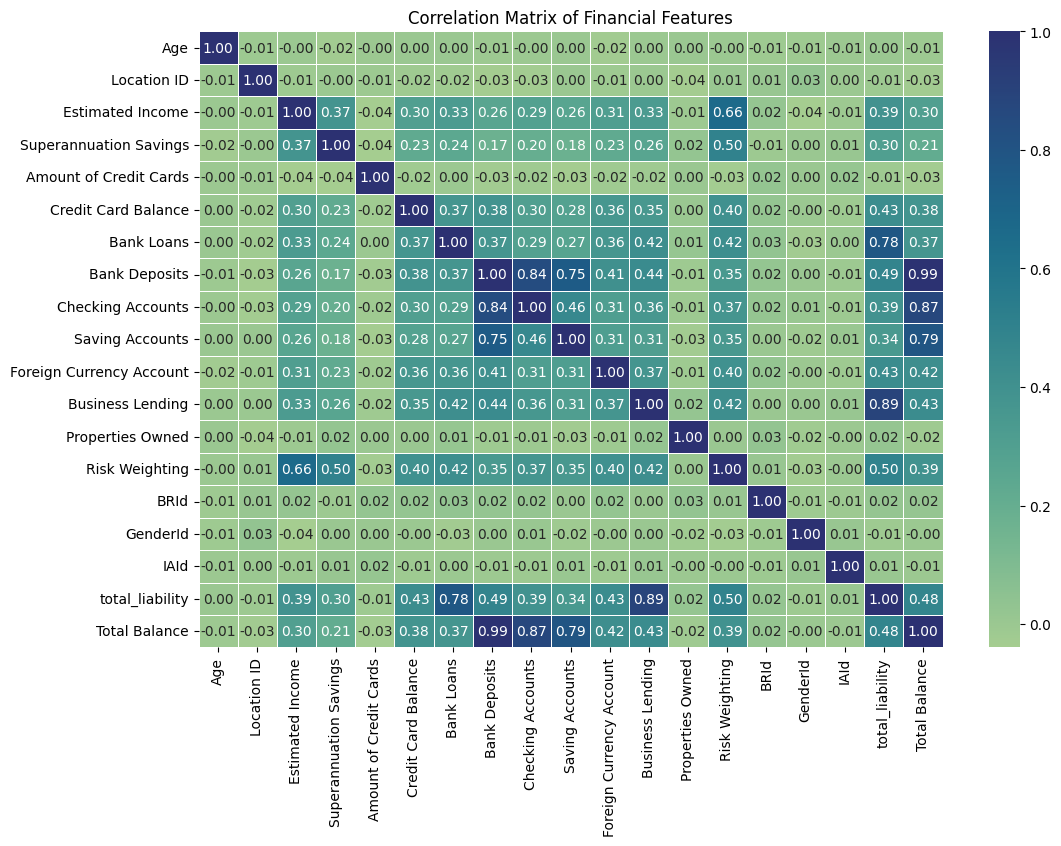

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Financial Features")
plt.show()

In [57]:
df['total_liability'].sum()

np.float64(4383966512.51)